In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)

To import the gates from a CSV pandas dataframe

In [2]:
import pandas
raw = pandas.read_csv('../cyto2func/standardised_cheeky.csv')
renamed = raw.rename(columns={'rrpu': 'decomp_flor'}).rename(columns={'newstandard': 'rrpu'})

from pyolin.dataframe import GateData
data = GateData(renamed)

/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/pyolin/utils.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  return ymin + (ymax - ymin) / (1 + pow(x / k, n))
/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/pyolin/utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return ymin + (ymax - ymin) / (1 + pow(x / k, n))


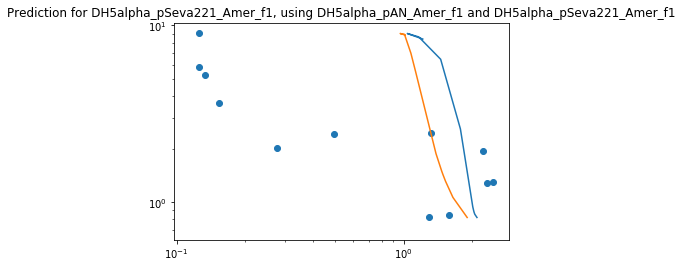

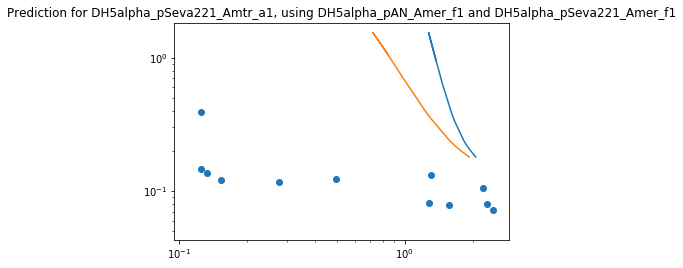

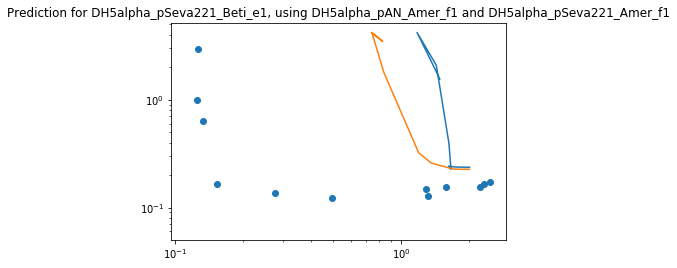

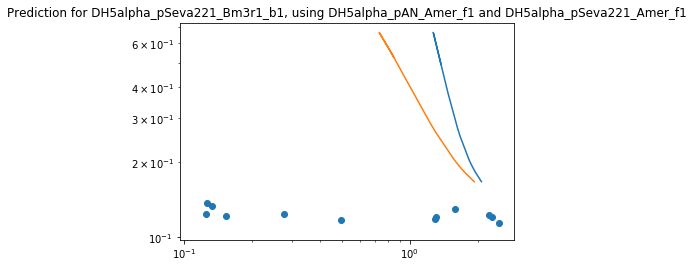

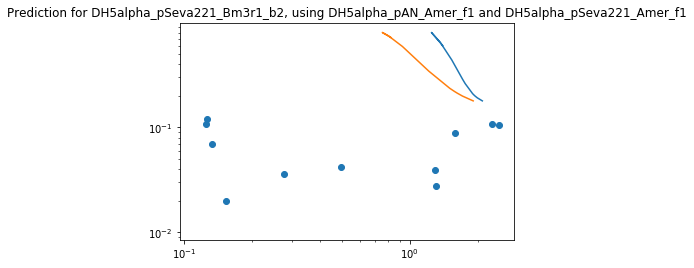

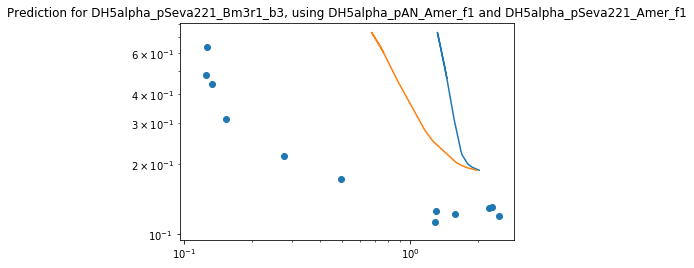

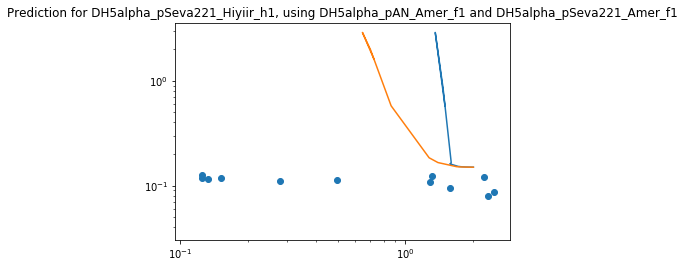

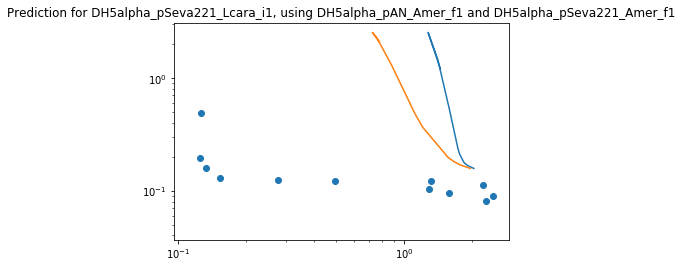

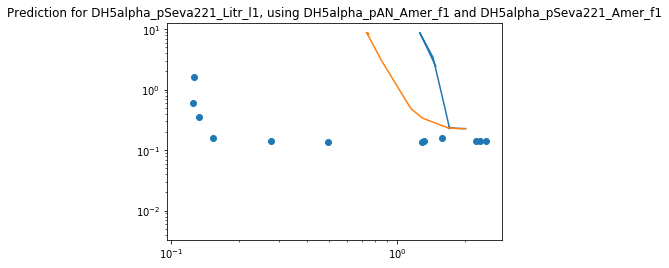

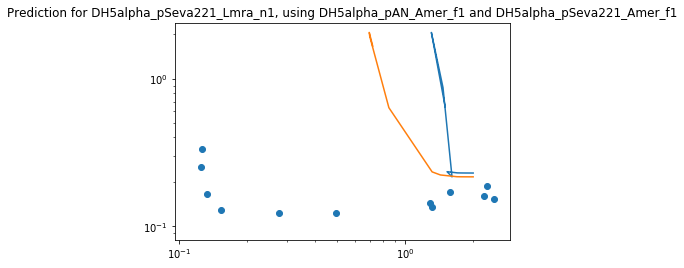

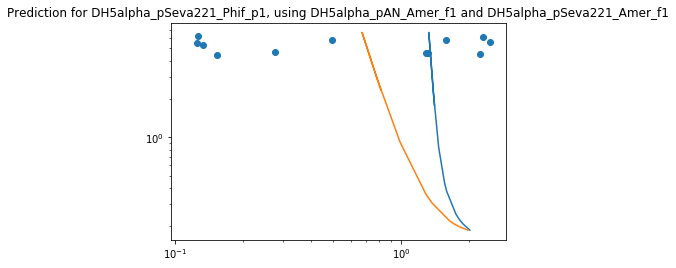

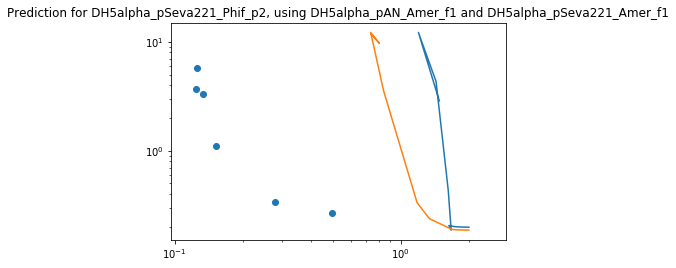

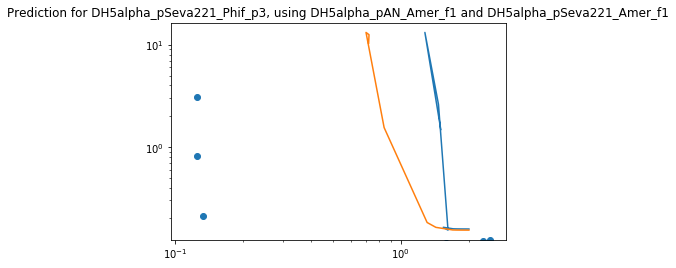

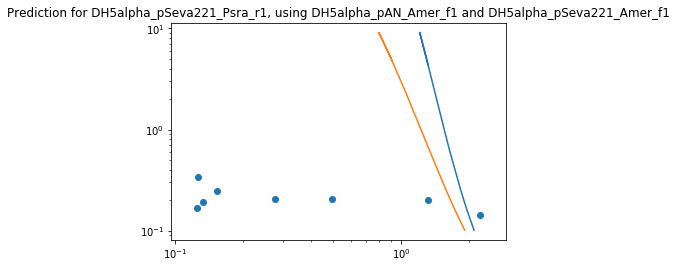

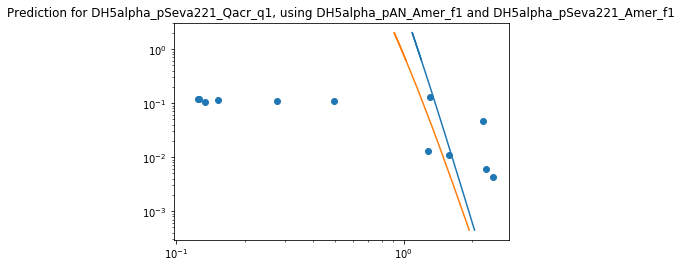

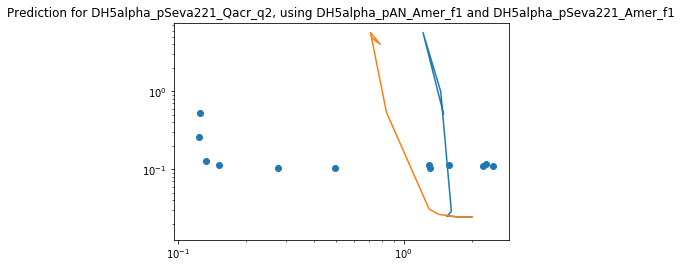

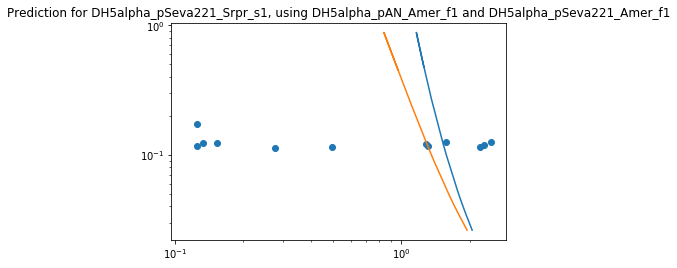

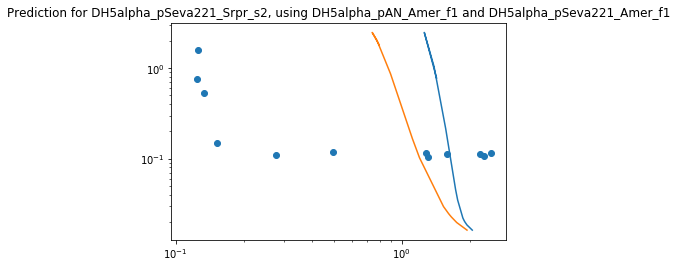

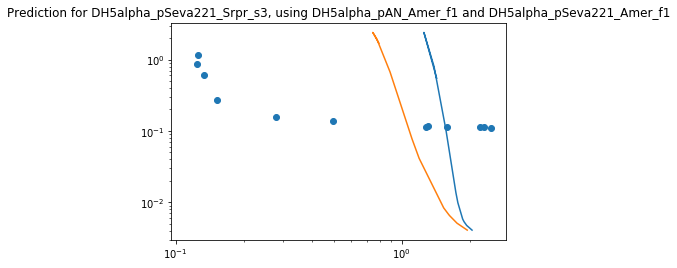

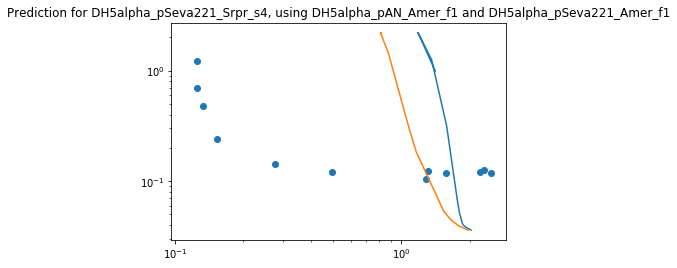

In [3]:
import matplotlib.pyplot as plt

from pyolin.utils import normalise
from pyolin.prediction import prediction

A = data['DH5alpha':'pAN':'Amer_f1']
B = data['DH5alpha':'pSeva221':'Amer_f1']

for ref in data['DH5alpha':'pAN':]:
    guess = data['DH5alpha':'pSeva221':ref.cargo]
    if guess:
        u, l = prediction(A, B, ref)
        
        fig, axes = plt.subplots()
        axes.plot(u[:, 0], u[:, 1])
        axes.plot(l[:, 0], l[:, 1])
        axes.scatter(guess.points[:, 0], guess.points[:, 1])
        axes.set_yscale('log')
        axes.set_xscale('log')
        axes.set_title(f"Prediction for {guess.name}, using {A.name} and {B.name}")
        plt.savefig(f"results/frechet_prediction_{A.name}_to_{B.name}_predicts_{guess.name}.eps")